In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
!pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
liver_disorders = fetch_ucirepo(id=60)

# data (as pandas dataframes)
X = liver_disorders.data.features
y = liver_disorders.data.targets

# metadata
print(liver_disorders.metadata)

# variable information
print(liver_disorders.variables)


{'uci_id': 60, 'name': 'Liver Disorders', 'repository_url': 'https://archive.ics.uci.edu/dataset/60/liver+disorders', 'data_url': 'https://archive.ics.uci.edu/static/public/60/data.csv', 'abstract': 'BUPA Medical Research Ltd. database donated by Richard S. Forsyth', 'area': 'Health and Medicine', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 345, 'num_features': 5, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['drinks'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2016, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C54G67', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': 'The first 5 variables are all blood tests which are thought to be sensitive to liver disorders that might arise from excessive alcohol consumption. Each line in the dataset constitutes the record of a single male individual.\n\nImportant note: The 7

In [4]:
X

,mcv,alkphos,sgpt,sgot,gammagt
0,85,92,45,27,31
1,85,64,59,32,23
2,86,54,33,16,54
3,91,78,34,24,36
4,87,70,12,28,10
...,...,...,...,...,...
340,99,75,26,24,41
341,96,69,53,43,203
342,98,77,55,35,89
343,91,68,27,26,14


In [5]:
y

,drinks
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
340,12.0
341,12.0
342,15.0
343,16.0


In [6]:
X_norm = (X - X.min())/(X.max() - X.min())

In [7]:
class LRWGD:
    def __init__(self):
        self.W = np.random.normal(size=5)
        self.b = 0
    def __linear_regression(self,X):
        return self.W[0]*X[:,0]+self.W[1]*X[:,1]+self.W[2]*X[:,2]+self.W[3]*X[:,3]+self.W[4]*X[:,4]+self.b
    def __loss_function(self,yTrue,yPred):
        return np.mean((yTrue-yPred)**2)
    def __gradient_descent(self,X,y,learning_rate):
        dldw = np.zeros(5)
        dldb = 0
        for i in range(X.shape[0]):
            dldw[0] += 2*(y[i]-(self.W[0]*X[i][0]+self.W[1]*X[i][1]+self.W[2]*X[i][2]+self.W[3]*X[i][3]+self.W[4]*X[i][4]+self.b))*(-X[i][0])
            dldw[1] += 2*(y[i]-(self.W[0]*X[i][0]+self.W[1]*X[i][1]+self.W[2]*X[i][2]+self.W[3]*X[i][3]+self.W[4]*X[i][4]+self.b))*(-X[i][1])
            dldw[2] += 2*(y[i]-(self.W[0]*X[i][0]+self.W[1]*X[i][1]+self.W[2]*X[i][2]+self.W[3]*X[i][3]+self.W[4]*X[i][4]+self.b))*(-X[i][2])
            dldw[3] += 2*(y[i]-(self.W[0]*X[i][0]+self.W[1]*X[i][1]+self.W[2]*X[i][2]+self.W[3]*X[i][3]+self.W[4]*X[i][4]+self.b))*(-X[i][3])
            dldw[4] += 2*(y[i]-(self.W[0]*X[i][0]+self.W[1]*X[i][1]+self.W[2]*X[i][2]+self.W[3]*X[i][3]+self.W[4]*X[i][4]+self.b))*(-X[i][4])
            dldb += 2*(y[i]-(self.W[0]*X[i][0]+self.W[1]*X[i][1]+self.W[2]*X[i][2]+self.W[3]*X[i][3]+self.W[4]*X[i][4]+self.b))*(-1)
        self.W[0] = self.W[0] - learning_rate*(dldw[0]/self.N)
        self.W[1] = self.W[1] - learning_rate*(dldw[1]/self.N)
        self.W[2] = self.W[2] - learning_rate*(dldw[2]/self.N)
        self.W[3] = self.W[3] - learning_rate*(dldw[3]/self.N)
        self.W[4] = self.W[4] - learning_rate*(dldw[4]/self.N)
        self.b = self.b - learning_rate*(dldb/self.N)

        return
    def cocokkan(self,X,y,learning_rate=0.01,n_epoch=1000):
        self.N = X.shape[0]
        losses = np.zeros(n_epoch)
        for epoch in range(n_epoch):
            self.__gradient_descent(X,y,learning_rate)
            yHat = self.__linear_regression(X)
            losses[epoch] = self.__loss_function(y,yHat)
        return losses
    def predict(self,X):
        return self.__linear_regression(X)

In [8]:
X_arr = X_norm.to_numpy()
y_arr = y.to_numpy().flatten()

model = LRWGD()
losses = model.cocokkan(X_arr,y_arr,n_epoch=100)

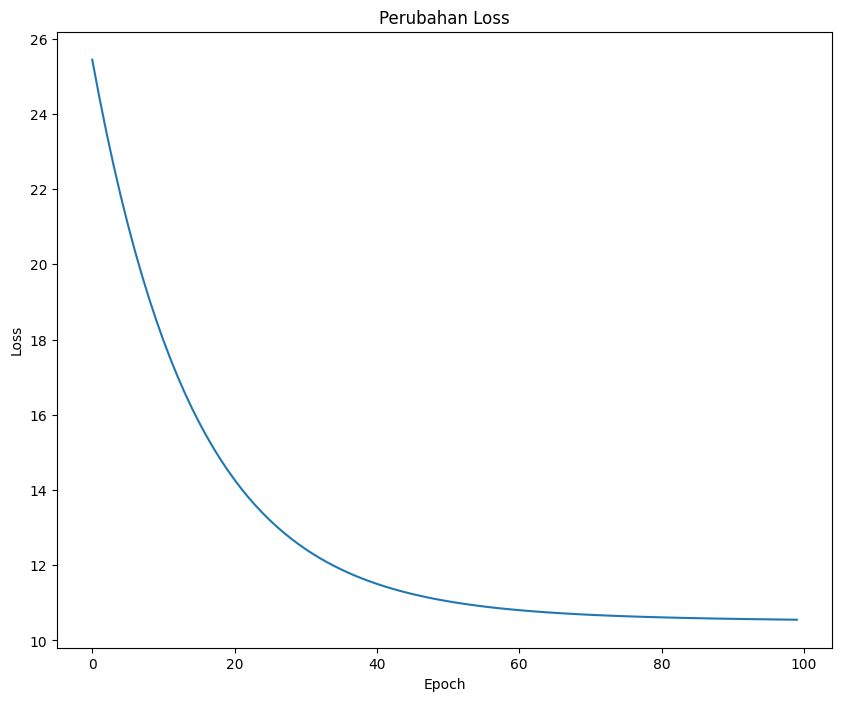

In [9]:
plt.figure(figsize=(10,8))
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Perubahan Loss')
plt.show()

In [10]:
pred = model.predict(X_arr)

In [11]:
pred

array([3.66777556, 3.52983448, 3.0111641 , 3.50898376, 3.38149891,
       3.17081397, 3.12505128, 3.06105272, 3.16890896, 3.19403308,
       3.14492075, 3.02108769, 3.61775073, 3.30382678, 3.38702387,
       3.60785166, 3.18259946, 3.30223419, 3.66971666, 4.06051681,
       3.1223187 , 2.89918644, 3.34489283, 3.33303498, 3.61267749,
       3.19308017, 2.98211893, 3.24522481, 3.49120715, 2.96589337,
       3.27687238, 3.25550249, 3.40688938, 3.5687221 , 3.27153819,
       4.72444215, 3.40249899, 2.76870607, 3.50333764, 3.20622328,
       3.92552097, 3.63861186, 3.69540063, 3.2540383 , 3.06487319,
       3.18757526, 3.07999701, 3.26941878, 3.41746312, 2.9936006 ,
       3.3758335 , 3.21322742, 3.61685409, 3.1334289 , 3.03594644,
       3.35590713, 3.35066153, 3.08199705, 3.47932231, 3.30880927,
       3.34919583, 3.19248734, 2.85860402, 3.14490049, 3.27583478,
       3.37129451, 3.1348809 , 3.11688108, 3.73510473, 3.22680615,
       3.28674123, 3.28469629, 3.27597989, 3.39125207, 3.08646

In [21]:
class LRWRGD:
    def __init__(self):
        self.W = np.random.normal(size=5)  # Weight (5 fitur)
        self.b = 0  # Bias

    def __linear_regression(self, X):
        return np.dot(X, self.W) + self.b

    def __loss_function(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

    def __find_min(self, i, X, y):
       if i == 0:
            error = y[i] - (self.W[0] * X[i][0] + self.W[1] * X[i][1] +
                            self.W[2] * X[i][2] + self.W[3] * X[i][3] +
                            self.W[4] * X[i][4] + self.b)
            dldw0 = 2 * error * (-X[i][0])
            dldw1 = 2 * error * (-X[i][1])
            dldw2 = 2 * error * (-X[i][2])
            dldw3 = 2 * error * (-X[i][3])
            dldw4 = 2 * error * (-X[i][4])
            dldb = 2 * error * (-1)
            return dldw0, dldw1, dldw2, dldw3, dldw4, dldb
       else:
            dldw0, dldw1, dldw2, dldw3, dldw4, dldb = self.__find_min(i - 1, X, y)
            error = y[i] - (self.W[0] * X[i][0] + self.W[1] * X[i][1] +
                            self.W[2] * X[i][2] + self.W[3] * X[i][3] +
                            self.W[4] * X[i][4] + self.b)

            dldw0 += 2 * error * (-X[i][0])
            dldw1 += 2 * error * (-X[i][1])
            dldw2 += 2 * error * (-X[i][2])
            dldw3 += 2 * error * (-X[i][3])
            dldw4 += 2 * error * (-X[i][4])
            dldb += 2 * error * (-1)

            return dldw0, dldw1, dldw2, dldw3, dldw4, dldb

    def __gradient_descent_recursive(self, X, y, learning_rate):
        dldw = np.zeros(5)
        dldb = 0
        dldw[0], dldw[1], dldw[2], dldw[3], dldw[4], dldb = self.__find_min(X.shape[0] - 1, X, y)

        self.W -= learning_rate * (dldw / self.N)
        self.b -= learning_rate * (dldb / self.N)

    def cocokkan(self, X, y, learning_rate=0.01, n_epochs=1000):
        self.N = X.shape[0]
        losses = np.zeros(n_epochs)

        for epoch in range(n_epochs):
            self.__gradient_descent_recursive(X, y, learning_rate)
            y_pred = self.__linear_regression(X)
            losses[epoch] = self.__loss_function(y, y_pred)

        return losses

    def prediksi(self, X):
        return self.__linear_regression(X)


In [22]:
modelR = LRWRGD()
lossesR = modelR.cocokkan(X_arr,y_arr)

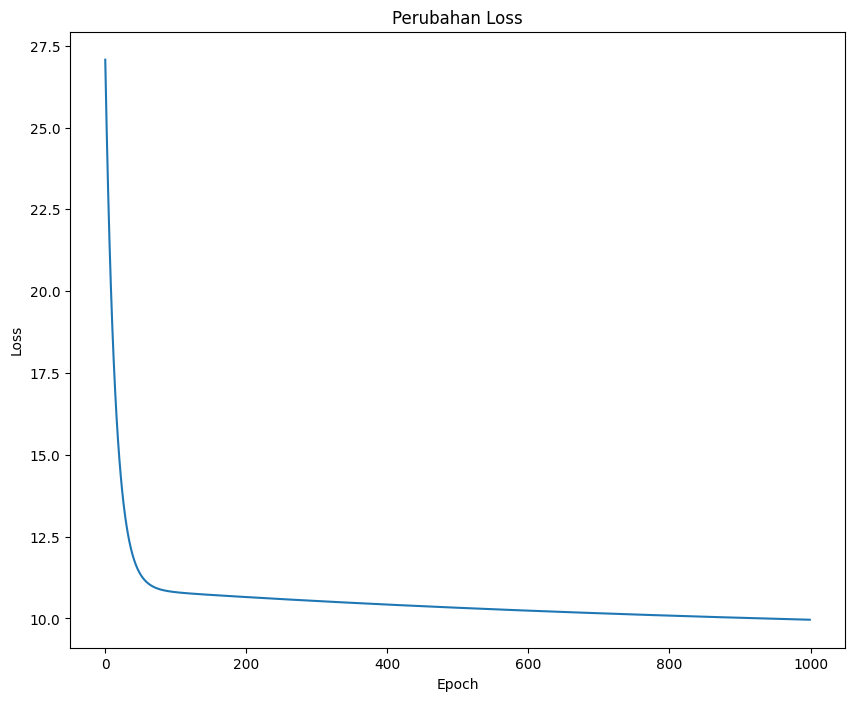

In [23]:
plt.figure(figsize=(10,8))
plt.plot(lossesR)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Perubahan Loss')
plt.show()

In [24]:
predR = modelR.prediksi(X_arr)

In [25]:
predR

array([3.74182341, 3.72095432, 3.27881521, 3.69280803, 2.82856706,
       3.27503293, 2.95975088, 3.03874948, 3.1099344 , 3.12341789,
       2.79502508, 2.63225644, 3.95853198, 3.15874289, 3.60046758,
       3.31131384, 3.125584  , 3.1478445 , 3.78334452, 3.60897114,
       3.48977444, 3.19132474, 3.08288484, 3.41956564, 3.94594227,
       3.40231429, 3.12249172, 3.00469582, 3.48622636, 2.96983643,
       3.23573439, 3.45333938, 3.70345324, 3.61614132, 3.33573041,
       6.40377328, 3.3666224 , 2.16671368, 3.2491078 , 3.24713936,
       4.24069163, 3.36123361, 3.37135492, 3.07014688, 2.99092019,
       2.94955118, 2.97630789, 3.57914738, 3.32927477, 2.8322041 ,
       3.14161192, 2.92669256, 4.43433445, 3.09834429, 2.93812643,
       2.93664729, 3.03124483, 2.88260135, 3.66297924, 3.22727806,
       3.2554982 , 3.07494598, 2.7215685 , 2.91484748, 3.34021682,
       3.33207991, 2.76872207, 2.90086377, 3.8248898 , 3.00952345,
       3.49591468, 3.55077719, 3.09738682, 3.5244744 , 2.81846